In [4]:
from apyori import apriori
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
data = {
    'sugar':list(" ".join(random.choices(['0','1'])) for i in range(0,100)),
    'corn':list(" ".join(random.choices(['0','1'])) for i in range(0,100)),
    'apple':list(" ".join(random.choices(['0','1']))for i in range(0,100)),
    'beetroot':list(" ".join(random.choices(['0','1'])) for i in range(0,100)),
    'banana':list(" ".join(random.choices(['0','1'])) for i in range(0,100)),
    'orange':list(" ".join(random.choices(['0','1'])) for i in range(0,100))
}

In [11]:
print(data)

{'sugar': ['1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0'], 'corn': ['1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1',

In [12]:
df = pd.DataFrame(data=data,columns=['sugar','corn','apple','beetroot','banana','orange'])

In [16]:
df.to_csv('ans.csv')

In [17]:
df.head()

,sugar,corn,apple,beetroot,banana,orange
0,1,1,1,1,0,0
1,1,0,0,1,0,1
2,1,1,1,0,1,1
3,0,0,0,0,1,1
4,1,0,1,0,0,0


In [18]:
records = []
for i in range(len(df)):
    record = []
    for j in range(len(df.columns)):
        if df.values[i,j]:
            record.append(df.columns[j])
    if len(record) != 0:
        records.append(record)

In [25]:
rules = list(apriori(records,min_support=0.4,min_confidence=0.6))

In [27]:
print(rules[0])

RelationRecord(items=frozenset({'apple'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'apple'}), confidence=1.0, lift=1.0)])


In [32]:
a = rules[7]
print(a)

RelationRecord(items=frozenset({'beetroot', 'apple'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beetroot', 'apple'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'apple'}), items_add=frozenset({'beetroot'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'beetroot'}), items_add=frozenset({'apple'}), confidence=1.0, lift=1.0)])


In [33]:
for i in a:
    print(i)

frozenset({'beetroot', 'apple'})
1.0
[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beetroot', 'apple'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'apple'}), items_add=frozenset({'beetroot'}), confidence=1.0, lift=1.0), OrderedStatistic(items_base=frozenset({'beetroot'}), items_add=frozenset({'apple'}), confidence=1.0, lift=1.0)]


In [35]:
import pyfpgrowth

In [37]:
help(pyfpgrowth.find_frequent_patterns)

Help on function find_frequent_patterns in module pyfpgrowth.pyfpgrowth:

find_frequent_patterns(transactions, support_threshold)
    Given a set of transactions, find the patterns in it
    over the specified support threshold.



In [45]:
min_support = 0.4
min_confidence = 0.6

In [49]:
itemsets = pyfpgrowth.find_frequent_patterns(records,min_support)

In [50]:
rules = pyfpgrowth.generate_association_rules(itemsets,min_confidence)

In [54]:
for i,j in rules.items():
    print(i,'======>',j)

('corn',) ======> (('apple', 'banana', 'beetroot', 'orange', 'sugar'), 1.0)
('sugar',) ======> (('apple', 'banana', 'beetroot', 'corn', 'orange'), 1.0)
('apple',) ======> (('banana', 'beetroot', 'corn', 'orange', 'sugar'), 1.0)
('beetroot',) ======> (('apple', 'banana', 'corn', 'orange', 'sugar'), 1.0)
('banana',) ======> (('apple', 'beetroot', 'corn', 'orange', 'sugar'), 1.0)
('orange',) ======> (('apple', 'banana', 'beetroot', 'corn', 'sugar'), 1.0)
('apple', 'corn') ======> (('banana', 'beetroot', 'orange', 'sugar'), 1.0)
('apple', 'sugar') ======> (('banana', 'beetroot', 'corn', 'orange'), 1.0)
('corn', 'sugar') ======> (('apple', 'banana', 'beetroot', 'orange'), 1.0)
('beetroot', 'corn') ======> (('apple', 'banana', 'orange', 'sugar'), 1.0)
('beetroot', 'sugar') ======> (('apple', 'banana', 'corn', 'orange'), 1.0)
('banana', 'corn') ======> (('apple', 'beetroot', 'orange', 'sugar'), 1.0)
('banana', 'sugar') ======> (('apple', 'beetroot', 'corn', 'orange'), 1.0)
('corn', 'orange') 

In [55]:
df = pd.read_csv('data.csv')

In [56]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2,44.0,NaN,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,NaN
2,3,900.0,Female,India,True,402865.0,31.0,Medical,UPI,Offline
3,4,46.0,NaN,USA,True,NaN,21.0,BabyCare,UPI,Offline
4,5,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [59]:
df = df.fillna(method='ffill')

In [60]:
df.isnull().sum()

CustID                     0
Age                        0
Gender                     0
Country                    0
Employed                   0
Income                     1
ItemsPurchased(monthly)    0
ProductType                0
PaymentType                0
Mode                       0
dtype: int64

In [61]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,Male,USA,True,NaN,99.0,BabyCare,Cash,Offline
1,2,44.0,Male,Russia,False,463034.0,21.0,BabyCare,Bank Transfer,Offline
2,3,900.0,Female,India,True,402865.0,31.0,Medical,UPI,Offline
3,4,46.0,Female,USA,True,402865.0,21.0,BabyCare,UPI,Offline
4,5,19.0,Female,Australia,True,221868.0,45.0,Medical,Bank Transfer,Online


In [63]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [75]:
df.isnull().sum()
from sklearn.preprocessing import LabelEncoder

In [77]:
df[['Gender','Country','ItemsPurchased(monthly)','ProductType','Mode']] = df[['Gender','Country','ItemsPurchased(monthly)','ProductType','Mode']].apply(LabelEncoder().fit_transform)

In [78]:
df.head()

,CustID,Age,Gender,Country,Employed,Income,ItemsPurchased(monthly),ProductType,PaymentType,Mode
0,1,37.0,1,4,True,241081.020408,38,1,Cash,0
1,2,44.0,1,1,False,463034.000000,5,1,Bank Transfer,0
2,3,900.0,0,3,True,402865.000000,11,4,UPI,0
3,4,46.0,0,4,True,402865.000000,5,1,UPI,0
4,5,19.0,0,2,True,221868.000000,16,4,Bank Transfer,1


In [79]:
X = df[['Gender','Country','ItemsPurchased(monthly)','ProductType']]
Y = df['Mode']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train,X_test,Y_train,Y_test  = train_test_split(X,Y)

clf = DecisionTreeClassifier()
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [83]:
from sklearn.metrics import plot_roc_curve, roc_auc_score,plot_confusion_matrix

In [84]:
y_pred = clf.predict(X_test)

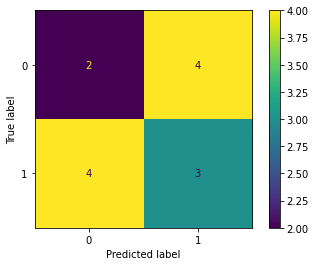

In [88]:
plot_confusion_matrix(clf,X_test,Y_test)

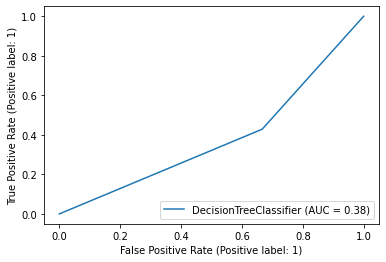

In [89]:
plot_roc_curve(clf,X_test,Y_test)

In [90]:
clf.score(X_test,Y_test)

0.38461538461538464